In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import shutil
import random
import tensorflow as tf
from PIL import Image
from tensorflow import keras
import tensorflow_hub as hub

In [2]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation, GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import plot_model

In [3]:
data_dir = pathlib.Path(r'D:\\Desktop\\capstone-algorithms\\algo manga\\densenet-manggatect\\data')
train_dir = r'D:\\Desktop\\capstone-algorithms\\algo manga\\densenet-manggatect\\data\\train'
val_dir = r'D:\\Desktop\\capstone-algorithms\\algo manga\\densenet-manggatect\\data\\valid'
test_dir = r'D:\\Desktop\\capstone-algorithms\\algo manga\\densenet-manggatect\\data\\testing'

In [4]:
# Show classes
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['testing' 'train' 'valid']


In [5]:
# Show total data in folder
for dirpath, dirnames, filenames in os.walk('nutri'):
  print(f"{len(dirnames)} folder and {len(filenames)} images in {dirpath}")

In [6]:
# Sets the global random seed.
tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)


In [7]:
# flow from directory using datagen (Pipeline)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=46)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=46)

Found 710 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 45 images belonging to 4 classes.


In [8]:
# Check class_indices
train_data.class_indices

{'stage-1': 0, 'stage-2': 1, 'stage-3': 2, 'stage-4': 3}

In [9]:
# Set labels
train_y=train_data.classes
val_y=valid_data.classes
test_y=test_data.classes


In [10]:
base_model = DenseNet169(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))
base_model.trainable = False

In [11]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model

In [12]:

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.optimizers import Adam

# Define input shape
inputs = Input(shape=(224, 224, 3))

# Add base model (DenseNet169)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add new layers
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Additional dense layer
x = Dense(512, activation='relu')(x)  # Increased complexity
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Another dense layer
x = Dense(256, activation='relu')(x)  # Further complexity
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Final output layer
outputs = Dense(4, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)

In [13]:
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d (G  (None, 1664)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1664)             6656      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 512)               852480

In [14]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# train model
history = model.fit(train_data, epochs=11, validation_data=valid_data)


Epoch 1/11
45/45 [==============================] - 63s 445ms/step - loss: 0.8957 - accuracy: 0.7042 - val_loss: 0.3545 - val_accuracy: 0.8577
Epoch 2/11
45/45 [==============================] - 13s 279ms/step - loss: 0.4097 - accuracy: 0.8606 - val_loss: 0.2754 - val_accuracy: 0.8775
Epoch 3/11
45/45 [==============================] - 13s 280ms/step - loss: 0.3833 - accuracy: 0.8986 - val_loss: 0.2704 - val_accuracy: 0.9051
Epoch 4/11
45/45 [==============================] - 12s 273ms/step - loss: 0.2628 - accuracy: 0.9014 - val_loss: 0.2415 - val_accuracy: 0.9130
Epoch 5/11
45/45 [==============================] - 13s 287ms/step - loss: 0.2058 - accuracy: 0.9225 - val_loss: 0.2336 - val_accuracy: 0.9289
Epoch 6/11
45/45 [==============================] - 13s 285ms/step - loss: 0.2432 - accuracy: 0.9211 - val_loss: 0.2782 - val_accuracy: 0.9091
Epoch 7/11
45/45 [==============================] - 13s 283ms/step - loss: 0.2364 - accuracy: 0.9211 - val_loss: 0.2846 - val_accuracy: 0.9170

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [16]:
# Function for showing plot of model
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title("Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title("DenseNet Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()



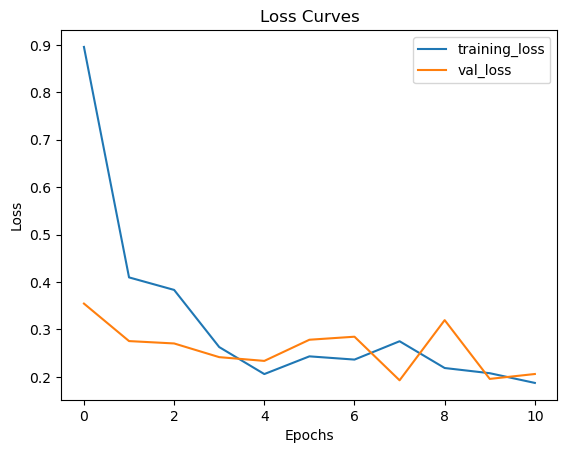

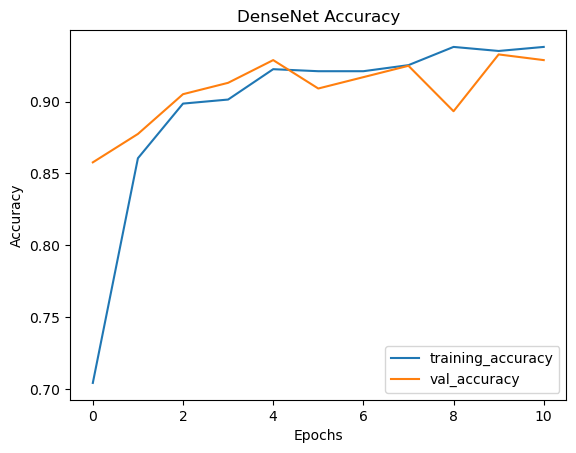

In [17]:
plot_loss_curves(history)

In [18]:
# classification report
val_pred = model.predict(valid_data)
val_pred = val_pred.argmax(axis=1)
print(classification_report(val_pred, val_y, zero_division=1))

16/16 [==============================] - 5s 128ms/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        23
           1       0.87      0.86      0.87        64
           2       1.00      0.89      0.94        85
           3       1.00      1.00      1.00        81

    accuracy                           0.93       253
   macro avg       0.89      0.94      0.91       253
weighted avg       0.94      0.93      0.93       253



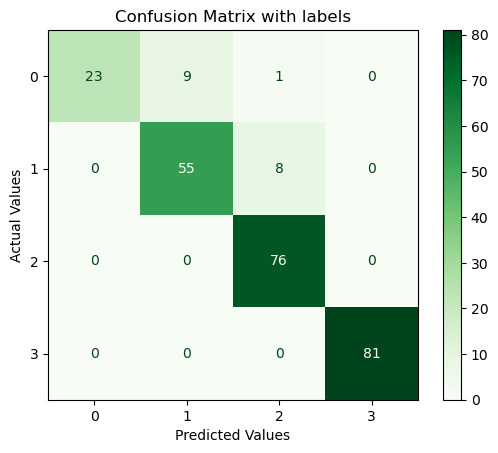

In [27]:
cm = confusion_matrix(val_y, val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)

plt.title('Confusion Matrix with labels')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [20]:
# classification report
test_pred = model.predict(test_data)
test_pred = test_pred.argmax(axis=1)
print(classification_report(test_pred, test_y))

3/3 [==============================] - 0s 145ms/step
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.92      0.96        12
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.97      0.96      0.96        45



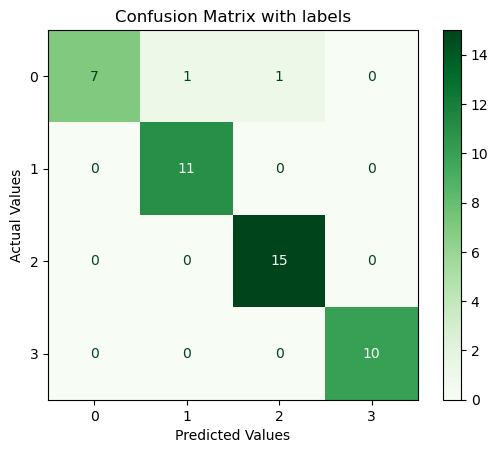

In [28]:
cm = confusion_matrix(test_y, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)

plt.title('Confusion Matrix with labels')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image dimensions
img_height, img_width = 224, 224

# Load and preprocess the image
image_path = 'predV4.jpg'
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (img_height, img_width))
image_normalized = image_resized / 255.0  # Normalize pixel values
image_expanded = np.expand_dims(image_normalized, axis=0)

In [39]:
# Make a prediction
pred = model.predict(image_expanded)

# Convert the prediction to a class label
class_indices = {v: k for k, v in train_data.class_indices.items()} 
predicted_class = class_indices[np.argmax(pred)]


1/1 [==============================] - 0s 57ms/step


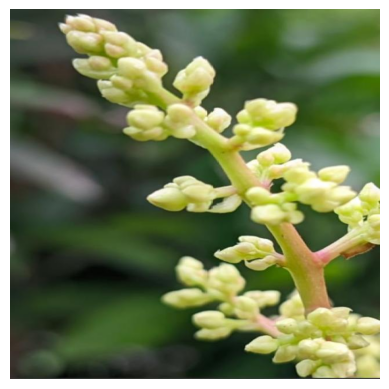

CLassified class: stage-2


In [40]:
# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

print(f'CLassified class: {predicted_class}')